In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [2]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

19793

In [3]:
df = df[df['NewDateTime']>= '2021-01-01'].copy()
len(df)

8531

In [4]:
# df.drop(df.head(len(df)%168).index,inplace=True)
# len(df)

In [5]:
int(len(df)-168)

8363

In [6]:
data_training = df.iloc[0:int(len(df)-168),:]
data_test = df.iloc[int(len(df)-168):int(len(df)),:]

data_training

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
11262,28995.13,28923.63,29031.34,28690.17,2311.811445,2021-01-01 00:00:00,1.002472,0.002469,1.041846,0.0367,38
11263,29409.99,28995.13,29470.00,28960.35,5403.068471,2021-01-01 01:00:00,1.014308,0.014207,1.041846,0.0367,36
11264,29194.65,29410.00,29465.26,29120.03,2384.231560,2021-01-01 02:00:00,0.992678,-0.007349,1.041846,0.0367,34
11265,29278.40,29195.25,29367.00,29150.02,1461.345077,2021-01-01 03:00:00,1.002869,0.002865,1.041846,0.0367,33
11266,29220.31,29278.41,29395.00,29029.40,2038.046803,2021-01-01 04:00:00,0.998016,-0.001986,1.041846,0.0367,32
...,...,...,...,...,...,...,...,...,...,...,...
19620,48674.90,47830.00,49259.98,47212.00,10878.121400,2021-12-15 19:00:00,1.017665,0.017511,1.000075,0.0100,47
19621,49211.84,48674.90,49500.00,48527.01,4690.616610,2021-12-15 20:00:00,1.011031,0.010971,1.000075,0.0100,47
19622,49168.89,49211.83,49358.75,48865.94,2276.034320,2021-12-15 21:00:00,0.999127,-0.000873,1.000075,0.0100,45
19623,48747.30,49168.89,49235.38,48653.00,1159.597200,2021-12-15 22:00:00,0.991426,-0.008611,1.000075,0.0100,41


In [7]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
11262,28995.13,28923.63,29031.34,28690.17,2311.811445,1.002472,0.002469,1.041846,0.0367,38
11263,29409.99,28995.13,29470.00,28960.35,5403.068471,1.014308,0.014207,1.041846,0.0367,36
11264,29194.65,29410.00,29465.26,29120.03,2384.231560,0.992678,-0.007349,1.041846,0.0367,34
11265,29278.40,29195.25,29367.00,29150.02,1461.345077,1.002869,0.002865,1.041846,0.0367,33
11266,29220.31,29278.41,29395.00,29029.40,2038.046803,0.998016,-0.001986,1.041846,0.0367,32
...,...,...,...,...,...,...,...,...,...,...
19620,48674.90,47830.00,49259.98,47212.00,10878.121400,1.017665,0.017511,1.000075,0.0100,47
19621,49211.84,48674.90,49500.00,48527.01,4690.616610,1.011031,0.010971,1.000075,0.0100,47
19622,49168.89,49211.83,49358.75,48865.94,2276.034320,0.999127,-0.000873,1.000075,0.0100,45
19623,48747.30,49168.89,49235.38,48653.00,1159.597200,0.991426,-0.008611,1.000075,0.0100,41


In [8]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.        , 0.        , 0.        , ..., 0.85604275, 0.37330183,
        0.27058824],
       [0.01046607, 0.00180049, 0.0109751 , ..., 0.85604275, 0.37330183,
        0.24705882],
       [0.00503348, 0.01224759, 0.01085651, ..., 0.85604275, 0.37330183,
        0.22352941],
       ...,
       [0.50894281, 0.51088992, 0.50858373, ..., 0.4289545 , 0.29444773,
        0.35294118],
       [0.49830695, 0.50980862, 0.50549706, ..., 0.4289545 , 0.29444773,
        0.30588235],
       [0.50127578, 0.49919255, 0.49895968, ..., 0.4289545 , 0.29444773,
        0.28235294]])

In [9]:
X_train = []
Y_train = []

In [10]:
training_data.shape

(8363, 10)

In [11]:
for i in range(168, training_data.shape[0],8):
    X_train.append(training_data[i-168:i])
    Y_train.append(training_data[i])

In [12]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [13]:
X_train.shape

(1025, 168, 10)

In [14]:
Y_train.shape

(1025, 10)

In [15]:
Y_train[1,0]

0.24354618331241096

In [16]:
X_train[2,167,0]

0.29854641540964155

In [17]:
# Y_train=Y_train.reshape(Y_train.shape[0],24,1)

In [18]:
# Y_train[1,:,0]

In [19]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [107]:
model = Sequential()
model.add(LSTM(units = 20, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
model.add(Dropout(0.2))
model.add(LSTM(units = 30, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 40, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units =10))

In [108]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 168, 20)           2480      
_________________________________________________________________
dropout_27 (Dropout)         (None, 168, 20)           0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 168, 30)           6120      
_________________________________________________________________
dropout_28 (Dropout)         (None, 168, 30)           0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 168, 50)           16200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 168, 50)           0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 40)              

In [109]:
model.compile(loss='mse', optimizer='adam')

In [110]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.33)

Train on 686 samples, validate on 339 samples
Epoch 1/30
686/686 [==============================] - 53s 77ms/sample - loss: 0.1337 - val_loss: 0.0450
Epoch 2/30
686/686 [==============================] - 33s 48ms/sample - loss: 0.0426 - val_loss: 0.0218
Epoch 3/30
686/686 [==============================] - 29s 43ms/sample - loss: 0.0346 - val_loss: 0.0212
Epoch 4/30
686/686 [==============================] - 29s 43ms/sample - loss: 0.0324 - val_loss: 0.0189
Epoch 5/30
686/686 [==============================] - 32s 46ms/sample - loss: 0.0285 - val_loss: 0.0146
Epoch 6/30
686/686 [==============================] - 34s 50ms/sample - loss: 0.0252 - val_loss: 0.0213
Epoch 7/30
686/686 [==============================] - 30s 44ms/sample - loss: 0.0225 - val_loss: 0.0113
Epoch 8/30
686/686 [==============================] - 29s 42ms/sample - loss: 0.0202 - val_loss: 0.0118
Epoch 9/30
686/686 [==============================] - 30s 44ms/sample - loss: 0.0186 - val_loss: 0.0092
Epoch 10/30
686/68

In [22]:
import tensorflow as tf
model = tf.keras.models.load_model('168_1_mw8.h5')

In [111]:
model.save("168_1_mw8.h5")

In [57]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

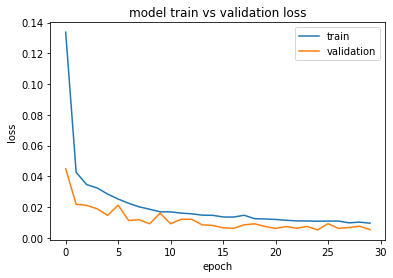

In [112]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [113]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,50399.83,50471.19,50797.76,50323.83,1165.14158,2021-12-09 00:00:00,0.998586,-0.001415,0.996332,0.01,19
1,50182.70,50399.84,50483.68,50147.89,871.61111,2021-12-09 01:00:00,0.995692,-0.004317,0.996332,0.01,19
2,49886.02,50182.71,50276.81,49620.62,1628.84987,2021-12-09 02:00:00,0.994088,-0.005930,0.996332,0.01,21
3,49513.35,49886.02,49934.12,49425.74,951.66432,2021-12-09 03:00:00,0.992530,-0.007498,0.996332,0.01,22
4,49816.07,49517.00,49821.01,49420.33,1052.17101,2021-12-09 04:00:00,1.006114,0.006095,0.996332,0.01,22
...,...,...,...,...,...,...,...,...,...,...,...
331,48931.99,48576.02,48950.00,48506.01,799.48215,2021-12-22 19:00:00,1.007328,0.007301,1.001202,0.01,46
332,48974.34,48931.99,49144.99,48860.47,1309.98901,2021-12-22 20:00:00,1.000865,0.000865,1.001202,0.01,47
333,49048.84,48974.33,49139.97,48836.72,894.46650,2021-12-22 21:00:00,1.001521,0.001520,1.001202,0.01,47
334,48977.21,49048.83,49084.45,48788.49,710.47289,2021-12-22 22:00:00,0.998540,-0.001461,1.001202,0.01,46


In [114]:
past_weeks

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
19457,50399.83,50471.19,50797.76,50323.83,1165.14158,2021-12-09 00:00:00,0.998586,-0.001415,0.996332,0.01,19
19458,50182.70,50399.84,50483.68,50147.89,871.61111,2021-12-09 01:00:00,0.995692,-0.004317,0.996332,0.01,19
19459,49886.02,50182.71,50276.81,49620.62,1628.84987,2021-12-09 02:00:00,0.994088,-0.005930,0.996332,0.01,21
19460,49513.35,49886.02,49934.12,49425.74,951.66432,2021-12-09 03:00:00,0.992530,-0.007498,0.996332,0.01,22
19461,49816.07,49517.00,49821.01,49420.33,1052.17101,2021-12-09 04:00:00,1.006114,0.006095,0.996332,0.01,22
...,...,...,...,...,...,...,...,...,...,...,...
19620,48674.90,47830.00,49259.98,47212.00,10878.12140,2021-12-15 19:00:00,1.017665,0.017511,1.000075,0.01,47
19621,49211.84,48674.90,49500.00,48527.01,4690.61661,2021-12-15 20:00:00,1.011031,0.010971,1.000075,0.01,47
19622,49168.89,49211.83,49358.75,48865.94,2276.03432,2021-12-15 21:00:00,0.999127,-0.000873,1.000075,0.01,45
19623,48747.30,49168.89,49235.38,48653.00,1159.59720,2021-12-15 22:00:00,0.991426,-0.008611,1.000075,0.01,41


In [115]:
df = df.drop(['NewDateTime'], axis = 1)
len(df)

336

In [116]:
inputs = scaler.transform(df)
inputs

array([[0.53999691, 0.54260266, 0.54458718, ..., 0.39067441, 0.29444773,
        0.04705882],
       [0.53451917, 0.54080595, 0.53672903, ..., 0.39067441, 0.29444773,
        0.04705882],
       [0.52703453, 0.53533826, 0.53155322, ..., 0.39067441, 0.29444773,
        0.07058824],
       ...,
       [0.50591419, 0.50490928, 0.50310994, ..., 0.44047072, 0.29444773,
        0.37647059],
       [0.50410711, 0.50678532, 0.50172085, ..., 0.44047072, 0.29444773,
        0.36470588],
       [0.49429217, 0.50498181, 0.49950511, ..., 0.44047072, 0.29444773,
        0.4       ]])

In [117]:
X_test = []
Y_test = []
for i in range(168, inputs.shape[0]):
    X_test.append(inputs[i-168:i])
    Y_test.append(inputs[i])

In [118]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((168, 168, 10), (168, 10))

In [119]:
scaler.scale_

array([2.52279598e-05, 2.51816288e-05, 2.50196029e-05, 2.48008553e-05,
       2.26040745e-05, 4.70137657e+00, 4.76290973e+00, 1.02247277e+01,
       2.95333727e+00, 1.17647059e-02])

In [120]:
scale = 1/2.52279598e-05
scale

39638.560070957465

In [121]:
data = (X_test[10,:,:]).reshape(1,168,10)
predata = model.predict(data)
# data = data[0,1:168,:].reshape(1,167,10)
# data = np.append(data, predata)
# data = data.reshape(1,168,10)
# data.shape
# predata = predata.reshape(1,1,10)
X_test.shape 

(168, 168, 10)

In [122]:
pred = []
real = []
data = (X_test[0,:,:]).reshape(1,168,10)
for i in range(0,168):
    predata = model.predict(data).reshape(1,1,10)
    data = data[0,1:168,:].reshape(1,167,10)
    data = np.append(data, predata)
    data = data.reshape(1,168,10)
    pred.append((predata[0,:,0])*scale)
    real.append((Y_test[i,0])*scale)


type(pred) , real[0]

(list, 20057.320035904853)

In [123]:
pred

[array([18022.969], dtype=float32),
 array([17993.098], dtype=float32),
 array([17967.893], dtype=float32),
 array([17943.06], dtype=float32),
 array([17915.113], dtype=float32),
 array([17881.867], dtype=float32),
 array([17842.47], dtype=float32),
 array([17797.137], dtype=float32),
 array([17746.783], dtype=float32),
 array([17692.697], dtype=float32),
 array([17636.371], dtype=float32),
 array([17579.268], dtype=float32),
 array([17522.652], dtype=float32),
 array([17467.5], dtype=float32),
 array([17414.494], dtype=float32),
 array([17364.062], dtype=float32),
 array([17316.47], dtype=float32),
 array([17271.852], dtype=float32),
 array([17230.188], dtype=float32),
 array([17190.768], dtype=float32),
 array([17153.223], dtype=float32),
 array([17117.547], dtype=float32),
 array([17083.717], dtype=float32),
 array([17051.71], dtype=float32),
 array([17021.494], dtype=float32),
 array([16993.03], dtype=float32),
 array([16966.266], dtype=float32),
 array([16941.148], dtype=float32),

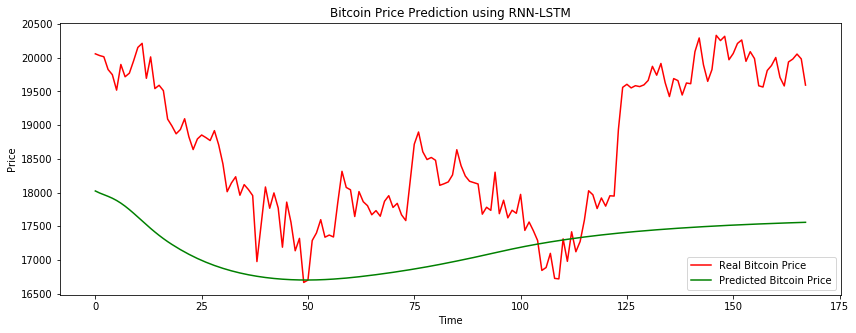

In [124]:
plt.figure(figsize=(14,5))
plt.plot(np.array(real).flat, color = 'red', label = 'Real Bitcoin Price')
plt.plot(np.array(pred).flat, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()